# 한글Word Cloud 작성

## 한글형태소 분석 맟 처리방법

In [2]:
독립선언 = open('../빅통분06-2/독립선언서.txt',encoding='utf-8').read()
독립선언

'쉽고 바르게 읽는 3.1독립선언서\n우리는 오늘 조선이 독립한 나라이며, 조선인이 이 나라의 주인임을 선언한다. 우리는 이를 세계 모든 나라에 알려 인류가 모두 평등하다는 큰 뜻을 분명히 하고, 우리 후손이 민족 스스로 살아갈 정당한 권리를 영원히 누리게 할 것이다. \n이 선언은 오천 년 동안 이어 온 우리 역사의 힘으로 하는 것이며, 이천만 민중의 정성을 모은 것이다. 우리 민족이 영원히 자유롭게 발전하려는 것이며, 인류가 양심에 따라 만들어가는 세계 변화의 큰 흐름에 발맞추려는 것이다. 이것은 하늘의 뜻이고 시대의 흐름이며, 전 인류가 함께 살아갈 정당한 권리에서 나온 것이다. 이 세상 어떤 것도 우리 독립을 가로막지 못한다.\n낡은 시대의 유물인 침략주의와 강권주의에 희생되어, 우리 민족이 수천 년 역사상 처음으로 다른 민족에게 억눌리는 고통을 받은 지 십 년이 지났다. 그동안 우리 스스로 살아갈 권리를 빼앗긴 고통은 헤아릴 수 없으며, 정신을 발달시킬 기회가 가로막힌 아픔이 얼마인가. 민족의 존엄함에 상처받은 아픔 또한 얼마이며, 새로운 기술과 독창성으로 세계 문화에 기여할 기회를 잃은 것이 얼마인가. \n아, 그동안 쌓인 억울함을 떨쳐 내고 지금의 고통을 벗어던지려면, 앞으로 닥쳐올 위협을 없애 버리고 억눌린 민족의 양심과 사라진 국가 정의를 다시 일으키려면, 사람들이 저마다 인격을 발달시키고 우리 가여운 자녀에게 고통스러운 유산 대신 완전한 행복을 주려면, 우리에게 가장 급한 일은 민족의 독립을 확실하게 하는 것이다. \n오늘, 우리 이천만 조선인은 저마다 가슴에 칼을 품었다. 모든 인류와 시대의 양심은 정의의 군대와 인도의 방패가 되어 우리를 지켜 주고 있다. 그러므로 우리는 나아가 싸우면 어떤 강한 적도 꺾을 수 있고, 설령 물러난다 해도 이루려 한다면 어떤 뜻도 펼칠 수 있다. \n우리는 일본이 1876년 강화도조약 뒤에 갖가지 약속을 지키지 않았다고 해서 일본을 믿을 수 없다고 비난하는 게 아니다. 일본의 학자와 정치가들이 우리 땅을 빼앗

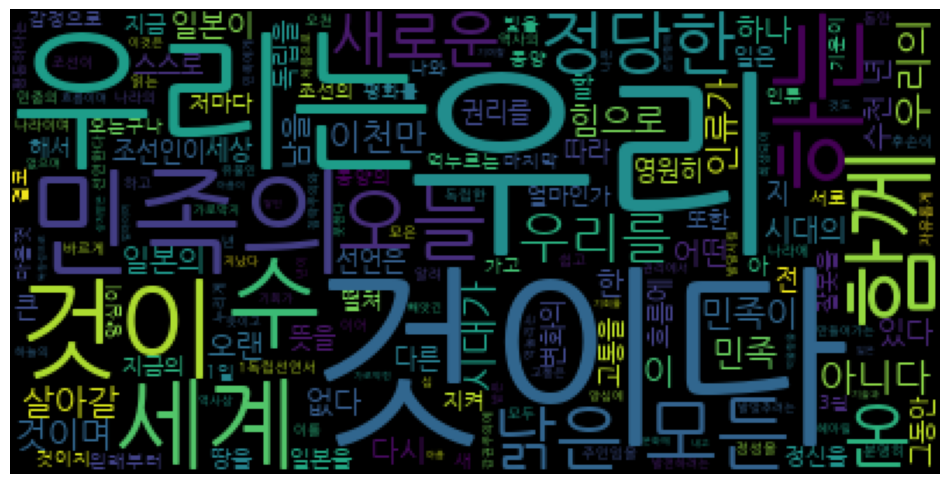

In [6]:
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud  # pip install wordcloud

matplotlib.rcParams["font.family"] = 'NanumGothic'
폰트위치 = 'C:/Windows/Fonts/NanumGothic.ttf'  

독립선언구름 = WordCloud(font_path = 폰트위치).generate(독립선언)
plt.figure(figsize=(12,12))
plt.imshow(독립선언구름)
plt.axis("off")
plt.show()

In [7]:
## 한글 Word Cloud를 작성하기 위한 Packages 설치
## pip install nltk konlpy
import nltk
import konlpy  # 업데이트가 느려서 3.9에선 돌아가지만 3.11에선 안돌아갈수도

## 형태소 분석
### Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
### http://semanticweb.kaist.ac.kr/hannanum/
### Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
### http://kkma.snu.ac.kr/
### Komoran: 코모란. Shineware에서 개발.
### https://github.com/shin285/KOMORAN
### Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
제일 좋지만 윈도우에서 사용 불가.
### https://bitbucket.org/eunjeon/mecab-ko
### Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
다음으로 좋음. 나머지는 좀 느림.
### https://github.com/open-korean-text/open-korean-text

In [8]:
# 형태소 분석:  
from konlpy.tag import Okt

okt = Okt()
## Open Korean Text: 오픈 소스 한국어 분석기. 과거 Twitter 형태소 분석기.
## Twitter" has changed to "Okt"  since KoNLPy v0.4.5


### Okt를 이용한 문장처리
- 정규화(normalization) 처리: .normalize()
- 어구추출(Phrase extraction): .phrases()
- 형태소 분석: .morphs()
- 형태소 분석(품사포함): .pos()
- 명사추출: .nouns()

In [9]:
okt.nouns(독립선언[:40])  # 명사 추출 
## 바르게가 스페인 지명이라 명사로 인식됨

['바르게', '독립선언서', '우리', '오늘', '조선', '독립', '나라']

In [10]:
인사 ="안녕하세욬ㅋㅋㅋ 샤릉해"
print(okt.normalize(인사))  # 정규화

안녕하세요ㅋㅋㅋ 사랑해


In [11]:
빅통분 = """이 강의에서는 Windows 10, 11 하에서 Apache에서 제공하는 다양한 빅데이터처리 툴(Hadoop, Spark, Kafka 등)을 
설치하고 환경 설정하는 작업을 직접 수행하기 때문에 컴퓨터에 대한 사전 지식이 없는 경우 수강하기 어려움. 
빅데이터의 특징인 3V와 같이 이 교과에서는 상당한 양과 다양한 내용을 빠르게 강의하기 때문에
강의를 수강하는데 필요한 통계 지식(회귀분석, 다변량분석 등)을 사전에 알고 있어야 함. 
일부 R이나 scala도 사용하는 경우도 있으나 기본 프로그램 언어는 python이며 python에 대해 기본적인 내용은 알고 있어야 함.
모든 프로젝트는 개인별로 평가를 받으며 별도의 팀프로젝트 없음.
모든 프로그램은 직접 코딩해야 함(소스 코드는 워터마크가 숨겨진 이미지 형태로 제공).
"""  # 여러줄 문자열

In [12]:
print(okt.phrases(빅통분))  # 어구추출

['이 강의', 'Windows', 'Windows 10', '11', '11 하', 'Apache', '제공', '제공하는 다양한 빅데이터처리', '제공하는 다양한 빅데이터처리 툴', 'Hadoop', 'Spark', 'Kafka', 'Kafka 등', '설치', '환경', '환경 설정', '환경 설정하는 작업', '직접', '직접 수행', '때문', '컴퓨터', '대한', '대한 사전', '대한 사전 지식', '없는 경우', '없는 경우 수강', '어려움', '빅데이터', '빅데이터의 특징', '3V', '이 교과', '상당한 양', '상당한 양과 다양한 내용', '강의', '수강', '필요한 통계', '필요한 통계 지식', '회귀분석', '변량분석', '변량분석 등', '사전', '일부', '일부 R이나', '일부 R이나 scala도', '일부 R이나 scala도 사용', '일부 R이나 scala도 사용하는 경우', '기본', '기본 프로그램', '기본 프로그램 언어', 'python', '대해', '내용', '모든', '모든 프로젝트', '개인별로', '개인별로 평가', '별도', '별도의 팀프로젝트', '모든 프로그램', '직접 코딩', '소스', '소스 코드', '워터마크', '이미지', '이미지 형태', '10', '처리', '설정', '작업', '수행', '지식', '경우', '특징', '교과', '통계', '이나', 'scala', '사용', '프로그램', '언어', '프로젝트', '개인', '별로', '평가', '코딩', '코드', '형태']


In [13]:
print(okt.morphs(빅통분))  # 형태소 분석

['이', '강의', '에서는', 'Windows', '10', ',', '11', '하', '에서', 'Apache', '에서', '제공', '하는', '다양한', '빅데이터', '처리', '툴', '(', 'Hadoop', ',', 'Spark', ',', 'Kafka', '등', ')', '을', '설치', '하고', '환경', '설정', '하는', '작업', '을', '직접', '수행', '하기', '때문', '에', '컴퓨터', '에', '대한', '사전', '지식', '이', '없는', '경우', '수강', '하기', '어려움', '.', '빅데이터', '의', '특징', '인', '3', 'V', '와', '같이', '이', '교과', '에서는', '상당한', '양', '과', '다양한', '내용', '을', '빠르게', '강의', '하기', '때문', '에', '\n', '강의', '를', '수강', '하는데', '필요한', '통계', '지식', '(', '회귀분석', ',', '다', '변량분석', '등', ')', '을', '사전', '에', '알', '고', '있어야', '함', '.', '일부', 'R', '이나', 'scala', '도', '사용', '하는', '경우', '도', '있으나', '기본', '프로그램', '언어', '는', 'python', '이며', 'python', '에', '대해', '기본', '적', '인', '내용', '은', '알', '고', '있어야', '함', '.', '\n', '모든', '프로젝트', '는', '개인', '별로', '평가', '를', '받으며', '별도', '의', '팀', '프로젝트', '없음', '.', '\n', '모든', '프로그램', '은', '직접', '코딩', '해야', '함', '(', '소스', '코드', '는', '워터마크', '가', '숨겨진', '이미지', '형태', '로', '제공', ').', '\n']


In [14]:
print(okt.pos(빅통분))  # 형태소 분석 + 품사

[('이', 'Noun'), ('강의', 'Noun'), ('에서는', 'Josa'), ('Windows', 'Alpha'), ('10', 'Number'), (',', 'Punctuation'), ('11', 'Number'), ('하', 'Noun'), ('에서', 'Josa'), ('Apache', 'Alpha'), ('에서', 'Josa'), ('제공', 'Noun'), ('하는', 'Verb'), ('다양한', 'Adjective'), ('빅데이터', 'Noun'), ('처리', 'Noun'), ('툴', 'Noun'), ('(', 'Punctuation'), ('Hadoop', 'Alpha'), (',', 'Punctuation'), ('Spark', 'Alpha'), (',', 'Punctuation'), ('Kafka', 'Alpha'), ('등', 'Noun'), (')', 'Punctuation'), ('을', 'Josa'), ('설치', 'Noun'), ('하고', 'Josa'), ('환경', 'Noun'), ('설정', 'Noun'), ('하는', 'Verb'), ('작업', 'Noun'), ('을', 'Josa'), ('직접', 'Noun'), ('수행', 'Noun'), ('하기', 'Verb'), ('때문', 'Noun'), ('에', 'Josa'), ('컴퓨터', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('사전', 'Noun'), ('지식', 'Noun'), ('이', 'Josa'), ('없는', 'Adjective'), ('경우', 'Noun'), ('수강', 'Noun'), ('하기', 'Verb'), ('어려움', 'Noun'), ('.', 'Punctuation'), ('빅데이터', 'Noun'), ('의', 'Josa'), ('특징', 'Noun'), ('인', 'Josa'), ('3', 'Number'), ('V', 'Alpha'), ('와', 'Verb'), ('같이', 'Adverb')

In [15]:
print(okt.nouns(빅통분))

['이', '강의', '하', '제공', '빅데이터', '처리', '툴', '등', '설치', '환경', '설정', '작업', '직접', '수행', '때문', '컴퓨터', '대한', '사전', '지식', '경우', '수강', '어려움', '빅데이터', '특징', '이', '교과', '양', '내용', '강의', '때문', '강의', '수강', '통계', '지식', '회귀분석', '변량분석', '등', '사전', '알', '함', '일부', '이나', '도', '사용', '경우', '기본', '프로그램', '언어', '대해', '기본', '내용', '알', '함', '모든', '프로젝트', '개인', '별로', '평가', '별도', '팀', '프로젝트', '모든', '프로그램', '직접', '코딩', '함', '소스', '코드', '워터마크', '이미지', '형태', '제공']


In [16]:
## koNLPy의 형태소 분석기와 NLTK의 Text 클래스를 결합하여 NLTK 기능을 사용
from nltk import Text

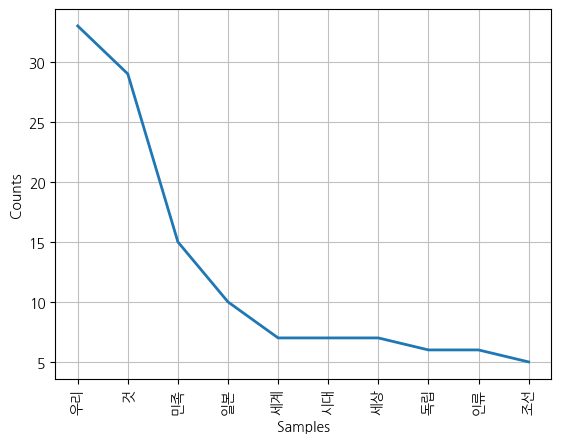

In [17]:
기미독립선언 = Text(okt.nouns(독립선언))
기미독립선언.plot(10)
plt.show()

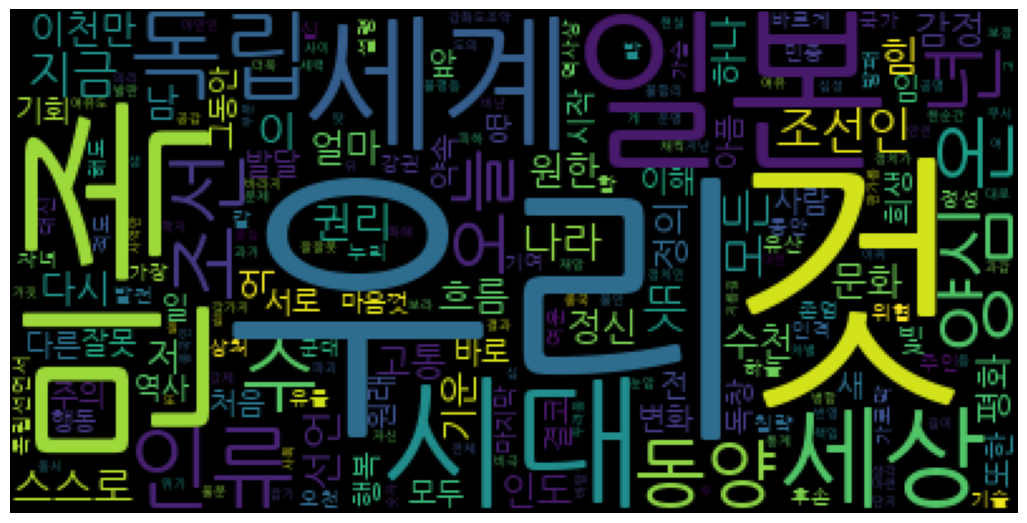

In [18]:
독립선언구름 = WordCloud(font_path=폰트위치)
plt.figure(figsize=(13,13))
plt.imshow(독립선언구름.generate_from_frequencies(기미독립선언.vocab()))  # 독립선언구름에 "기미독립선언의 사전"을 붙여서 
plt.axis("off")
plt.show()

In [29]:
import numpy as np
from PIL import Image

바탕그림 = np.array(Image.open("../빅통분06-2/한반도기.jpg"))

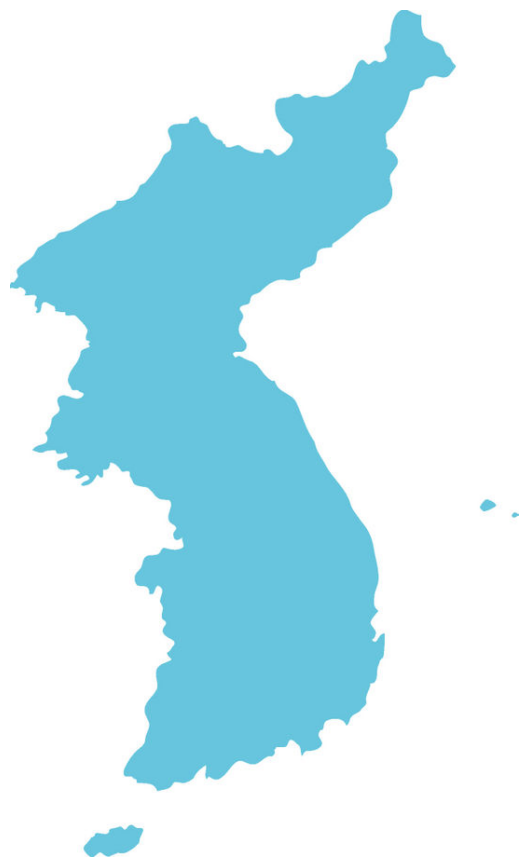

In [25]:
plt.figure(figsize=(13,11))
plt.imshow(바탕그림,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis("off")
plt.show()

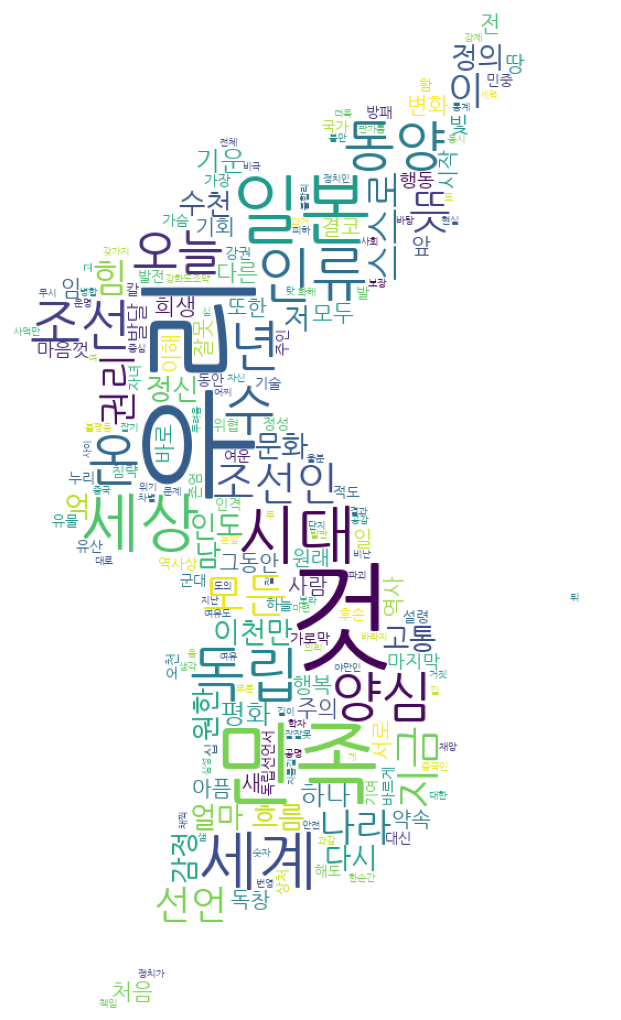

In [26]:
독립선언구름 = WordCloud(background_color="white",mask=바탕그림, font_path=폰트위치)
plt.figure(figsize=(13,13))
plt.imshow(독립선언구름.generate_from_frequencies(기미독립선언.vocab()))
plt.axis("off")
plt.show()

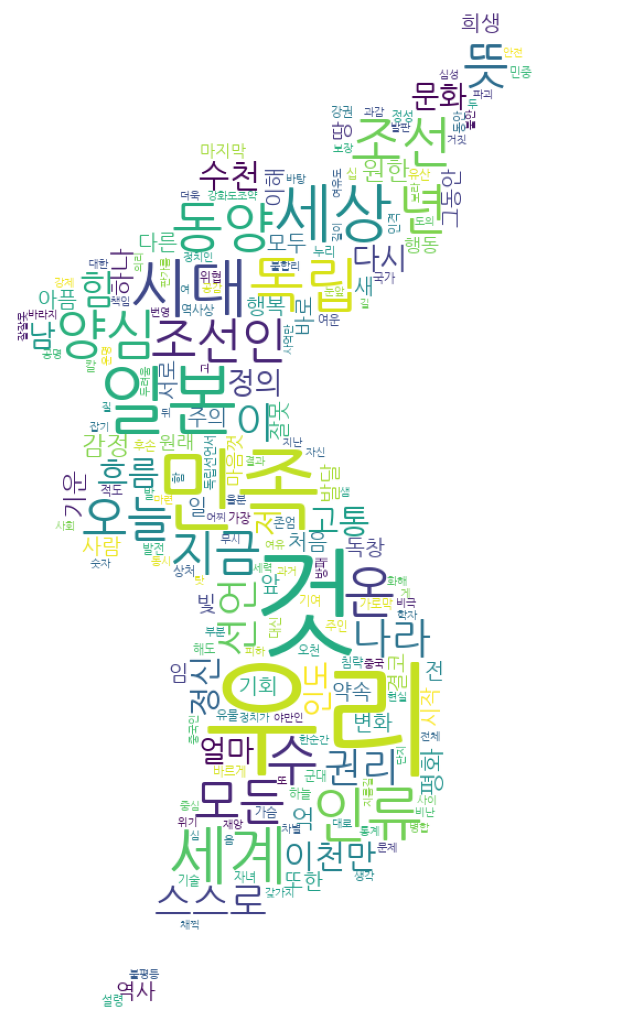

In [27]:
독립선언구름 = WordCloud(background_color="white",mask=바탕그림, font_path=폰트위치)
plt.figure(figsize=(13,13))
plt.imshow(독립선언구름.generate_from_frequencies(기미독립선언.vocab()))
plt.axis("off")
plt.savefig("Korea.jpg")